# Outlier Detection

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.font_manager

# Zad.
Wczytaj dane z https://www.kaggle.com/mlg-ulb/creditcardfraud.

In [2]:
df = pd.read_csv("data\creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
X_data = df.values[:,:-1]
y_data = df.values[:,-1]
print(X_data.shape)
print(y_data.shape)

(284807, 30)
(284807,)


# Zmniejszymy zbiór danych, żeby się szybciej liczył
# W domu policzyć na całym repozytorium

In [94]:
n = 10000
X = np.vstack( (X_data[y_data==0][ np.random.randint(len(X_data[y_data==0]), size=n) ] , X_data[y_data==1]))
y = np.hstack( (np.repeat(-1, n), np.repeat(1, len(X_data[y_data==1])) ) )
# y = np.repeat(1, len(X_data[y_data==1]))
print(X.shape)
print(y.shape)

(10492, 30)
(10492,)


# Zad
Sprawdź czy w danych nie ma jakiś mising data

In [5]:
null_counts = df.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# Zad
Wykonaj wizualizację zbioru danych:
 * pairplot
 * heatmap correlation
 * barplot
 * PCA 
 * T-SNE

In [7]:
import seaborn as sns
df=pd.DataFrame(X)
# sns.pairplot(df)
# plt.show()

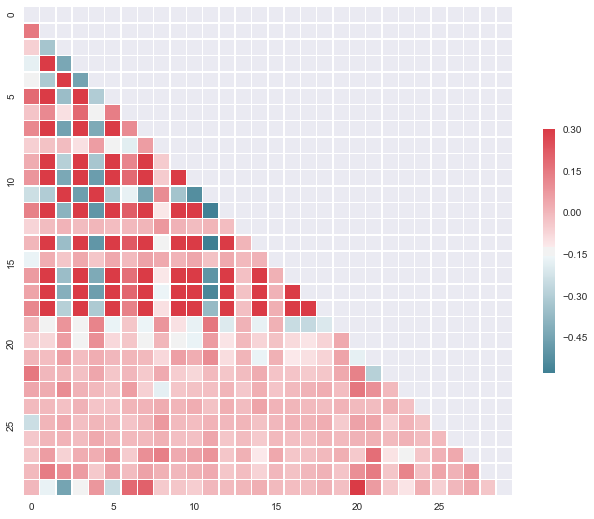

In [8]:
sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

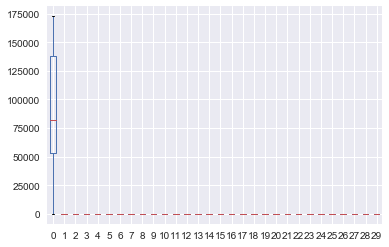

In [41]:
df.boxplot()
plt.show()

In [44]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
X_tsne = tsne.fit_transform(X)

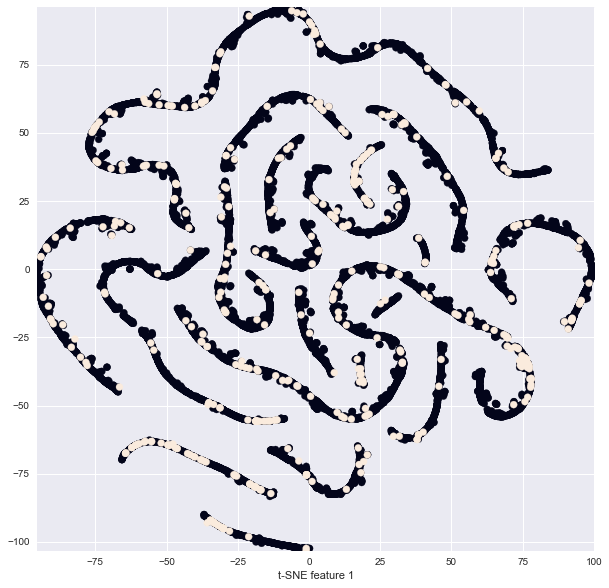

In [47]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y)
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")
plt.show()

In [48]:
from sklearn.decomposition import PCA
# build a PCA model
pca = PCA(n_components=2)
pca.fit(X)
# transform the digits data onto the first two principal components
X_pca = pca.transform(X)

<Figure size 720x720 with 0 Axes>

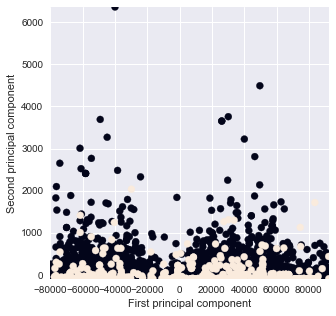

In [50]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.figure(figsize=(5, 5))
plt.xlim(X_pca[:, 0].min()-1, X_pca[:, 0].max()+1)
plt.ylim(X_pca[:, 1].min()-1, X_pca[:, 1].max()+1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

# Zad

* Poniższy zbiór danych na dane testowe i treniengowe. 
* Zwizualizuj liczności w grupach za pomocą histogramu

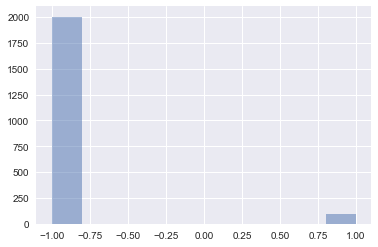

Train class 0 (0, 30)
Train class 0 (395, 30)
Test class 0 (0, 30)
Test class 0 (97, 30)


In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()
print("Train class 0", X_train[y_train==0].shape)
print("Train class 0", X_train[y_train==1].shape)

print("Test class 0", X_test[y_test==0].shape)
print("Test class 0", X_test[y_test==1].shape)


# Zad 

Znajdź najlepszy model:

* EllipticEnvelope
* One-class SVM
* IsolationForest

Wykonaj ewaluację z apomocą

 * Accuracy
 * F1 score

In [96]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=10, random_state=seed)

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [103]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("LSVC", EllipticEnvelope(contamination=0.1))    
])

pipe.fit(X_train)
acc = metrics.accuracy_score( y_pred = pipe.predict(X_test), y_true = y_test)
f1 = metrics.f1_score( y_pred = pipe.predict(X_test), y_true = y_test)

print("Accuracy ", acc)
print("F1 score", f1)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-193.186991110740593 > -196.094407216801272)
  % (det, previous_det), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-164.230572925872707 > -164.835717767192449)
  % (det, previous_det), RuntimeWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-245.287569410066993 > -283.179006142121580)
  % (det, previous_det), RuntimeWarning)


Accuracy  0.07479752262982373
F1 score 0.01820020222446916
